In [22]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

STAGE 1 - MERGING DATASETS

In [23]:
#Preparing the dataset
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

df_trustpilot = pd.read_csv('data/data_trustpilot_clean.csv', engine='python')


In [24]:
display(df_trustpilot.head())

,username,number_reviews,location,rating,text,date_posted,date_of_experience,verification,subject,answer,page_number,company
0,Dest Iny,7 reviews,GB,5,"ST2 9AL Had an issue with the scan, an employe...",2024-11-15 11:42:09,"November 11, 2024",NaN,ST2 9AL,NaN,1,Asda
1,Paula Gray,4 reviews,GB,1,Your call centre staff are not the most helpfu...,2024-11-13 18:26:52,"November 13, 2024",NaN,Your call centre staff are not the most…,NaN,1,Asda
2,Neil Dodds,4 reviews,GB,1,"Just received my order from asda accrington, ...",2024-11-14 21:20:00,"November 14, 2024",NaN,Just received my order from asda…,NaN,1,Asda
3,Julie Currey,5 reviews,GB,1,"Just had an online home delivery dropped off, ...",2024-11-13 23:34:32,"November 13, 2024",NaN,"Asda, where did it all go wrong?",NaN,1,Asda
4,Jessiejames,3 reviews,GB,2,Used the Asda rewards app to save for Christma...,2024-11-10 22:10:35,"October 01, 2024",NaN,Rewards not worth it,NaN,1,Asda


STAGE 2 - DATASET INSPECTIONS

In [25]:
#Inspecting the full dataset

print("These are the names of the columns present: ", "\n", df_trustpilot.columns)
print("The dataset has ", df_trustpilot.shape[1], "columns")
print("The dataset has ", df_trustpilot.shape[0], "rows")

These are the names of the columns present:  
 Index(['username', 'number_reviews', 'location', 'rating', 'text',
       'date_posted', 'date_of_experience', 'verification', 'subject',
       'answer', 'page_number', 'company'],
      dtype='object')
The dataset has  12 columns
The dataset has  125362 rows


In [26]:
#Deleting the page_number column as it is no longer needed or relevant

df_trustpilot.drop(columns=['page_number'], inplace=True)

#Verifying the output
print("These are the names of the columns present: ", "\n", df_trustpilot.columns)
print("The dataset has ", df_trustpilot.shape[1], "columns")
print("The dataset has ", df_trustpilot.shape[0], "rows")

These are the names of the columns present:  
 Index(['username', 'number_reviews', 'location', 'rating', 'text',
       'date_posted', 'date_of_experience', 'verification', 'subject',
       'answer', 'company'],
      dtype='object')
The dataset has  11 columns
The dataset has  125362 rows


In [27]:
print("Printing the relevant information from the file such as type per variable: ", "n")
print(df_trustpilot.info())

Printing the relevant information from the file such as type per variable:  n
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125362 entries, 0 to 125361
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   username            125343 non-null  object
 1   number_reviews      125362 non-null  object
 2   location            125360 non-null  object
 3   rating              125362 non-null  int64 
 4   text                125362 non-null  object
 5   date_posted         125362 non-null  object
 6   date_of_experience  125362 non-null  object
 7   verification        94076 non-null   object
 8   subject             125359 non-null  object
 9   answer              32019 non-null   object
 10  company             125362 non-null  object
dtypes: int64(1), object(10)
memory usage: 10.5+ MB
None


In [28]:
#Converting rating to integer

print(df_trustpilot['rating'].unique())

df_trustpilot['rating'] = df_trustpilot['rating'].astype('int')


[5 1 2 4 3]


In [29]:
#Amending the dataset
#number_reviews: Removing 'review(s)' from cell and converting to an integer
df_trustpilot['number_reviews'] = df_trustpilot['number_reviews'].str.replace('(?i)reviews', '', regex=True).str.strip()
df_trustpilot['number_reviews'] = df_trustpilot['number_reviews'].str.replace('(?i)review', '', regex=True).str.strip()
print(df_trustpilot['number_reviews'].value_counts())
df_trustpilot['number_reviews'] = df_trustpilot['number_reviews'].astype(int)

#Verifying output
print(df_trustpilot.info())
print(df_trustpilot.head())

number_reviews
1      68753
2      23533
3      10674
4       5703
5       3446
6       2281
7       1622
8       1198
9        937
10       745
11       658
12       549
13       448
14       385
15       346
16       298
18       237
17       229
19       216
21       207
23       183
22       166
20       164
24       155
26       135
25       125
27       107
29        95
28        94
30        80
33        77
32        77
31        76
36        65
35        63
34        59
39        58
37        53
41        49
38        45
42        42
44        38
40        37
46        33
47        33
45        32
43        30
55        30
48        28
52        28
50        28
49        26
56        23
53        23
51        22
57        22
62        20
54        19
69        19
59        17
67        17
58        17
60        17
63        16
68        15
66        14
64        12
89        11
70        10
65        10
79        10
61        10
78         9
94         8
77         8
81        

In [30]:
#date_of_experience: Converting to datetime format
df_trustpilot['date_of_experience'] = pd.to_datetime(df_trustpilot['date_of_experience'], errors='coerce')

#date_posted: convert to datetime format
df_trustpilot['date_posted'] = pd.to_datetime(df_trustpilot['date_posted'])

print(df_trustpilot.info())
print(df_trustpilot.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125362 entries, 0 to 125361
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   username            125343 non-null  object        
 1   number_reviews      125362 non-null  int64         
 2   location            125360 non-null  object        
 3   rating              125362 non-null  int64         
 4   text                125362 non-null  object        
 5   date_posted         125362 non-null  datetime64[ns]
 6   date_of_experience  125362 non-null  datetime64[ns]
 7   verification        94076 non-null   object        
 8   subject             125359 non-null  object        
 9   answer              32019 non-null   object        
 10  company             125362 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 10.5+ MB
None
       username  number_reviews location  rating  \
0      Dest Iny      

STAGE 3 - DUPLICATES AND MISSING VALUES

In [31]:
#Identifying and handling duplicates in the dataset

print("Duplicate rows before:")
print(df_trustpilot.duplicated().sum())

df_trustpilot = df_trustpilot.drop_duplicates()

print("Duplicate rows after:")
print(df_trustpilot.duplicated().sum())

Duplicate rows before:


11
Duplicate rows after:
0


In [32]:
#Identifying missing values in the dataset

print("Missing values:")
print(df_trustpilot.isnull().sum())

Missing values:
username                 19
number_reviews            0
location                  2
rating                    0
text                      0
date_posted               0
date_of_experience        0
verification          31285
subject                   3
answer                93333
company                   0
dtype: int64


There are five columns with missing values: username, text, verification, subject, and answer
username only has 17 missing values and the username column is not critical so we can override that with the most frequently used value from other columns
verification has 17,053 missing values - if verification is missing that means the user didnt verify themselves. Based on this, we should inspect the different options for this column and fill it with the value most likely representing 'Not verified'. 
text has 5683 missing values and is our biggest challenge. Based on the text we predict the rating. Determine what % of our entries has no text and then most likely proceed with deleting those rows.
subject has 3 missing values. Based on the low number, we will remove these rows.
answer has 63,735 missing values. We will fill those rows with 0s.

In [33]:
#Handling missing values

#Username missing value
print("This is the distribution of the types of username in the dataset: ", "\n", df_trustpilot['username'].value_counts().head())

#The username with the highest number in the dataset is 'Customer'. As this is a non-descript name for a username, we will apply it to the missing username.
df_trustpilot['username'] = df_trustpilot['username'].fillna('Customer')

#Verification missing value
print("This is the distribution of the types of verifications in the dataset: ", "\n", df_trustpilot['verification'].value_counts().head())

#Inspection indicates that there is no value under verification specifically indicating that a user is not verified. We will hence create a new variable named 'Not Verified' and fill the n/a values with it. 
df_trustpilot['verification'] = df_trustpilot['verification'].fillna('Not Verified')

#Text and subject missing value
na_percentage = (df_trustpilot['text'].isna().sum() / len(df_trustpilot)) * 100
print("The percentage of n/a values in the text column compared to the full dataset is:", "\n")
print(na_percentage)

#The text cells with missing values for text represent 6.6% of the full dataset. Due to the criticality of this column and the size of the dataset, the decision has been made to remove rows with n/a values for text.
#Subject with missing values will also be dropped due to the low number
df_trustpilot = df_trustpilot.dropna(axis=0, how='any', subset=['text', 'subject'])

# Answer has a large number of empty values, which is to be expected.
# We will fill those values with 0
df_trustpilot['answer'] = df_trustpilot['answer'].fillna(0)

df_trustpilot.dropna(inplace=True)

print("Missing values:")
print(df_trustpilot.isnull().sum())

print("The dataset has ", df_trustpilot.shape[1], "columns")
print("The dataset has ", df_trustpilot.shape[0], "rows")


This is the distribution of the types of username in the dataset:  
 username
John        809
customer    760
Robert      652
David       642
James       569
Name: count, dtype: int64
This is the distribution of the types of verifications in the dataset:  
 verification
Verified      76868
Invited       17147
Redirected       50
Merged            1
Name: count, dtype: int64
The percentage of n/a values in the text column compared to the full dataset is: 

0.0
Missing values:
username              0
number_reviews        0
location              0
rating                0
text                  0
date_posted           0
date_of_experience    0
verification          0
subject               0
answer                0
company               0
dtype: int64
The dataset has  11 columns
The dataset has  125346 rows


In [34]:
print("Checking dtypes are correct:")
print(df_trustpilot.info())

print("Verifying there are no more missing values:")
print(df_trustpilot.isnull().sum().sum())

print("Verifying there are no more duplicates:")
print(df_trustpilot.duplicated().sum())


Checking dtypes are correct:
<class 'pandas.core.frame.DataFrame'>
Index: 125346 entries, 0 to 125361
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   username            125346 non-null  object        
 1   number_reviews      125346 non-null  int64         
 2   location            125346 non-null  object        
 3   rating              125346 non-null  int64         
 4   text                125346 non-null  object        
 5   date_posted         125346 non-null  datetime64[ns]
 6   date_of_experience  125346 non-null  datetime64[ns]
 7   verification        125346 non-null  object        
 8   subject             125346 non-null  object        
 9   answer              125346 non-null  object        
 10  company             125346 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 11.5+ MB
None
Verifying there are no more missing values:
0
Ver

In [35]:
#Fix content standardization
print(df_trustpilot.columns)

#username
display(df_trustpilot['username'].value_counts().head(10))
#Standardizing 'customer' and 'Customer'
df_trustpilot['username'] = df_trustpilot['username'].str.title()

#There are additional entries that are not of value to us in this column. 'Quicken Member' and 'Anonymous' should also be converted to 'Customer' as all of these entries are people who did not provide their real name.
replacements = {'Quicken Member': 'Customer','Anonymous': 'Customer', 'Anounymous': 'Customer'}
df_trustpilot['username'] = df_trustpilot['username'].replace(replacements)
display(df_trustpilot['username'].value_counts().head(10))

Index(['username', 'number_reviews', 'location', 'rating', 'text',
       'date_posted', 'date_of_experience', 'verification', 'subject',
       'answer', 'company'],
      dtype='object')


username
John        809
customer    760
Robert      652
David       642
James       569
Michael     498
Richard     448
William     368
Paul        331
Customer    331
Name: count, dtype: int64

username
Customer    1436
John         975
Robert       777
David        744
James        687
Michael      592
Richard      514
William      476
Paul         377
Mark         308
Name: count, dtype: int64

STAGE 3 - TARGET VARIABLE INSPECTION

In [36]:
#Inspecting statistical distributions of target variable 'rating'
print("These are the statistical distributions of the target variable present in the dataset: ", "\n")
print(df_trustpilot['rating'].describe())

#Calculating mode, mean and median for each numeric variable

mode_value = df_trustpilot['rating'].mode()[0]
mode_count = df_trustpilot['rating'].value_counts().iloc[0]
    
median_value = df_trustpilot['rating'].median()
    

print(f"The most common rating is {mode_value}, appearing {mode_count} times")
print(f"The median rating is: {median_value:.2f}")

These are the statistical distributions of the target variable present in the dataset:  

count    125346.000000
mean          3.534951
std           1.666003
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64
The most common rating is 5, appearing 60111 times
The median rating is: 4.00


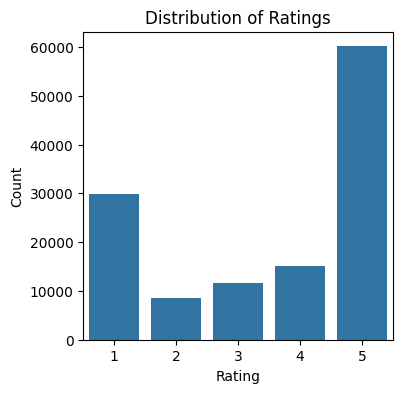

In [37]:
#Shows the distribution of rating
plt.figure(figsize=(4, 4))
sns.countplot(data=df_trustpilot, x='rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#Distribution shows a class imbalance

In [38]:
#Inspecting final output 

print(df_trustpilot.columns)
print(df_trustpilot.info())
print("The Trustpilot dataset has ", df_trustpilot.shape[1], "columns")
print("The Trustpilot dataset has ", df_trustpilot.shape[0], "rows")
display(df_trustpilot.head())

Index(['username', 'number_reviews', 'location', 'rating', 'text',
       'date_posted', 'date_of_experience', 'verification', 'subject',
       'answer', 'company'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
Index: 125346 entries, 0 to 125361
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   username            125346 non-null  object        
 1   number_reviews      125346 non-null  int64         
 2   location            125346 non-null  object        
 3   rating              125346 non-null  int64         
 4   text                125346 non-null  object        
 5   date_posted         125346 non-null  datetime64[ns]
 6   date_of_experience  125346 non-null  datetime64[ns]
 7   verification        125346 non-null  object        
 8   subject             125346 non-null  object        
 9   answer              125346 non-null  object        
 10  company             125346 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 11.5+ MB
None
The Trustpilot dataset has  11 columns
The Trustpilot dataset has  125346 rows

,username,number_reviews,location,rating,text,date_posted,date_of_experience,verification,subject,answer,company
0,Dest Iny,7,GB,5,"ST2 9AL Had an issue with the scan, an employe...",2024-11-15 11:42:09,2024-11-11,Not Verified,ST2 9AL,0,Asda
1,Paula Gray,4,GB,1,Your call centre staff are not the most helpfu...,2024-11-13 18:26:52,2024-11-13,Not Verified,Your call centre staff are not the most…,0,Asda
2,Neil Dodds,4,GB,1,"Just received my order from asda accrington, ...",2024-11-14 21:20:00,2024-11-14,Not Verified,Just received my order from asda…,0,Asda
3,Julie Currey,5,GB,1,"Just had an online home delivery dropped off, ...",2024-11-13 23:34:32,2024-11-13,Not Verified,"Asda, where did it all go wrong?",0,Asda
4,Jessiejames,3,GB,2,Used the Asda rewards app to save for Christma...,2024-11-10 22:10:35,2024-10-01,Not Verified,Rewards not worth it,0,Asda


In [39]:
import os

os.makedirs('data', exist_ok=True)

csv_path = 'data/data_trustpilot_first.csv'
df_trustpilot.to_csv(csv_path, index=False)
print(f"DataFrame exported to {csv_path}")

DataFrame exported to data/data_trustpilot_first.csv
